In [99]:
import zipfile
import pandas as pd
import os
from sklearn.model_selection import train_test_split

# Path to the ZIP file
zip_file_path = 'C:/Users/Asus/Downloads/archive.zip'

# Directory to extract the CSV files
extract_dir = 'C:/Users/Asus/Downloads/extracted_files'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List all CSV files in the extracted directory
csv_files = [f for f in os.listdir(extract_dir) if f.endswith('.csv')]

# Read each CSV file into a pandas DataFrame and store in a dictionary
dataframes = {}
for csv_file in csv_files:
    file_path = os.path.join(extract_dir, csv_file)
    df = pd.read_csv(file_path)
    dataframes[csv_file] = df
    print(f"Loaded {csv_file} with shape {df.shape}")

# Split each DataFrame into training and test sets using 80-20 split
train_test_splits = {}
for csv_file, df in dataframes.items():
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    train_test_splits[csv_file] = (train_df, test_df)
    print(f"Split {csv_file} into train with shape {train_df.shape} and test with shape {test_df.shape}")

# Display the first few rows of each training and test set
for csv_file, (train_df, test_df) in train_test_splits.items():
    print(f"\nFirst five rows of training set for {csv_file}:\n", train_df.head())
    print(f"\nFirst five rows of test set for {csv_file}:\n", test_df.head())



Loaded Bangalore.csv with shape (6207, 40)
Loaded Chennai.csv with shape (5014, 40)
Loaded Delhi.csv with shape (4998, 40)
Loaded Hyderabad.csv with shape (2518, 40)
Loaded Kolkata.csv with shape (6507, 40)
Loaded Mumbai.csv with shape (7719, 40)
Split Bangalore.csv into train with shape (4965, 40) and test with shape (1242, 40)
Split Chennai.csv into train with shape (4011, 40) and test with shape (1003, 40)
Split Delhi.csv into train with shape (3998, 40) and test with shape (1000, 40)
Split Hyderabad.csv into train with shape (2014, 40) and test with shape (504, 40)
Split Kolkata.csv into train with shape (5205, 40) and test with shape (1302, 40)
Split Mumbai.csv into train with shape (6175, 40) and test with shape (1544, 40)

First five rows of training set for Bangalore.csv:
          Price  Area                 Location  No. of Bedrooms  Resale  \
765    4732000  1315                 Sarjapur                3       0   
286    4816000  1376              Uttarahalli               

In [103]:
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [105]:
test_df.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,1.544000e+03,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,...,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000
mean,1.587585e+07,1015.165803,1.933938,0.669041,7.443005,7.400907,7.366580,7.374352,7.369171,7.415803,...,7.450130,7.345207,7.391192,7.300518,7.310881,7.306995,7.301166,7.302461,7.312824,7.302461
std,2.195607e+07,572.120642,0.875704,0.470711,3.230303,3.319344,3.389828,3.374029,3.384572,3.288174,...,3.214936,3.432811,3.339479,3.520568,3.500465,3.508021,3.519316,3.516810,3.496680,3.516810
min,2.000000e+06,216.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.600000e+06,650.000000,1.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,9.700000e+06,900.000000,2.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.800000e+07,1205.000000,2.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,4.200000e+08,7600.000000,6.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7719 entries, 0 to 7718
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                7719 non-null   int64 
 1   Area                 7719 non-null   int64 
 2   Location             7719 non-null   object
 3   No. of Bedrooms      7719 non-null   int64 
 4   Resale               7719 non-null   int64 
 5   MaintenanceStaff     7719 non-null   int64 
 6   Gymnasium            7719 non-null   int64 
 7   SwimmingPool         7719 non-null   int64 
 8   LandscapedGardens    7719 non-null   int64 
 9   JoggingTrack         7719 non-null   int64 
 10  RainWaterHarvesting  7719 non-null   int64 
 11  IndoorGames          7719 non-null   int64 
 12  ShoppingMall         7719 non-null   int64 
 13  Intercom             7719 non-null   int64 
 14  SportsFacility       7719 non-null   int64 
 15  ATM                  7719 non-null   int64 
 16  ClubHo

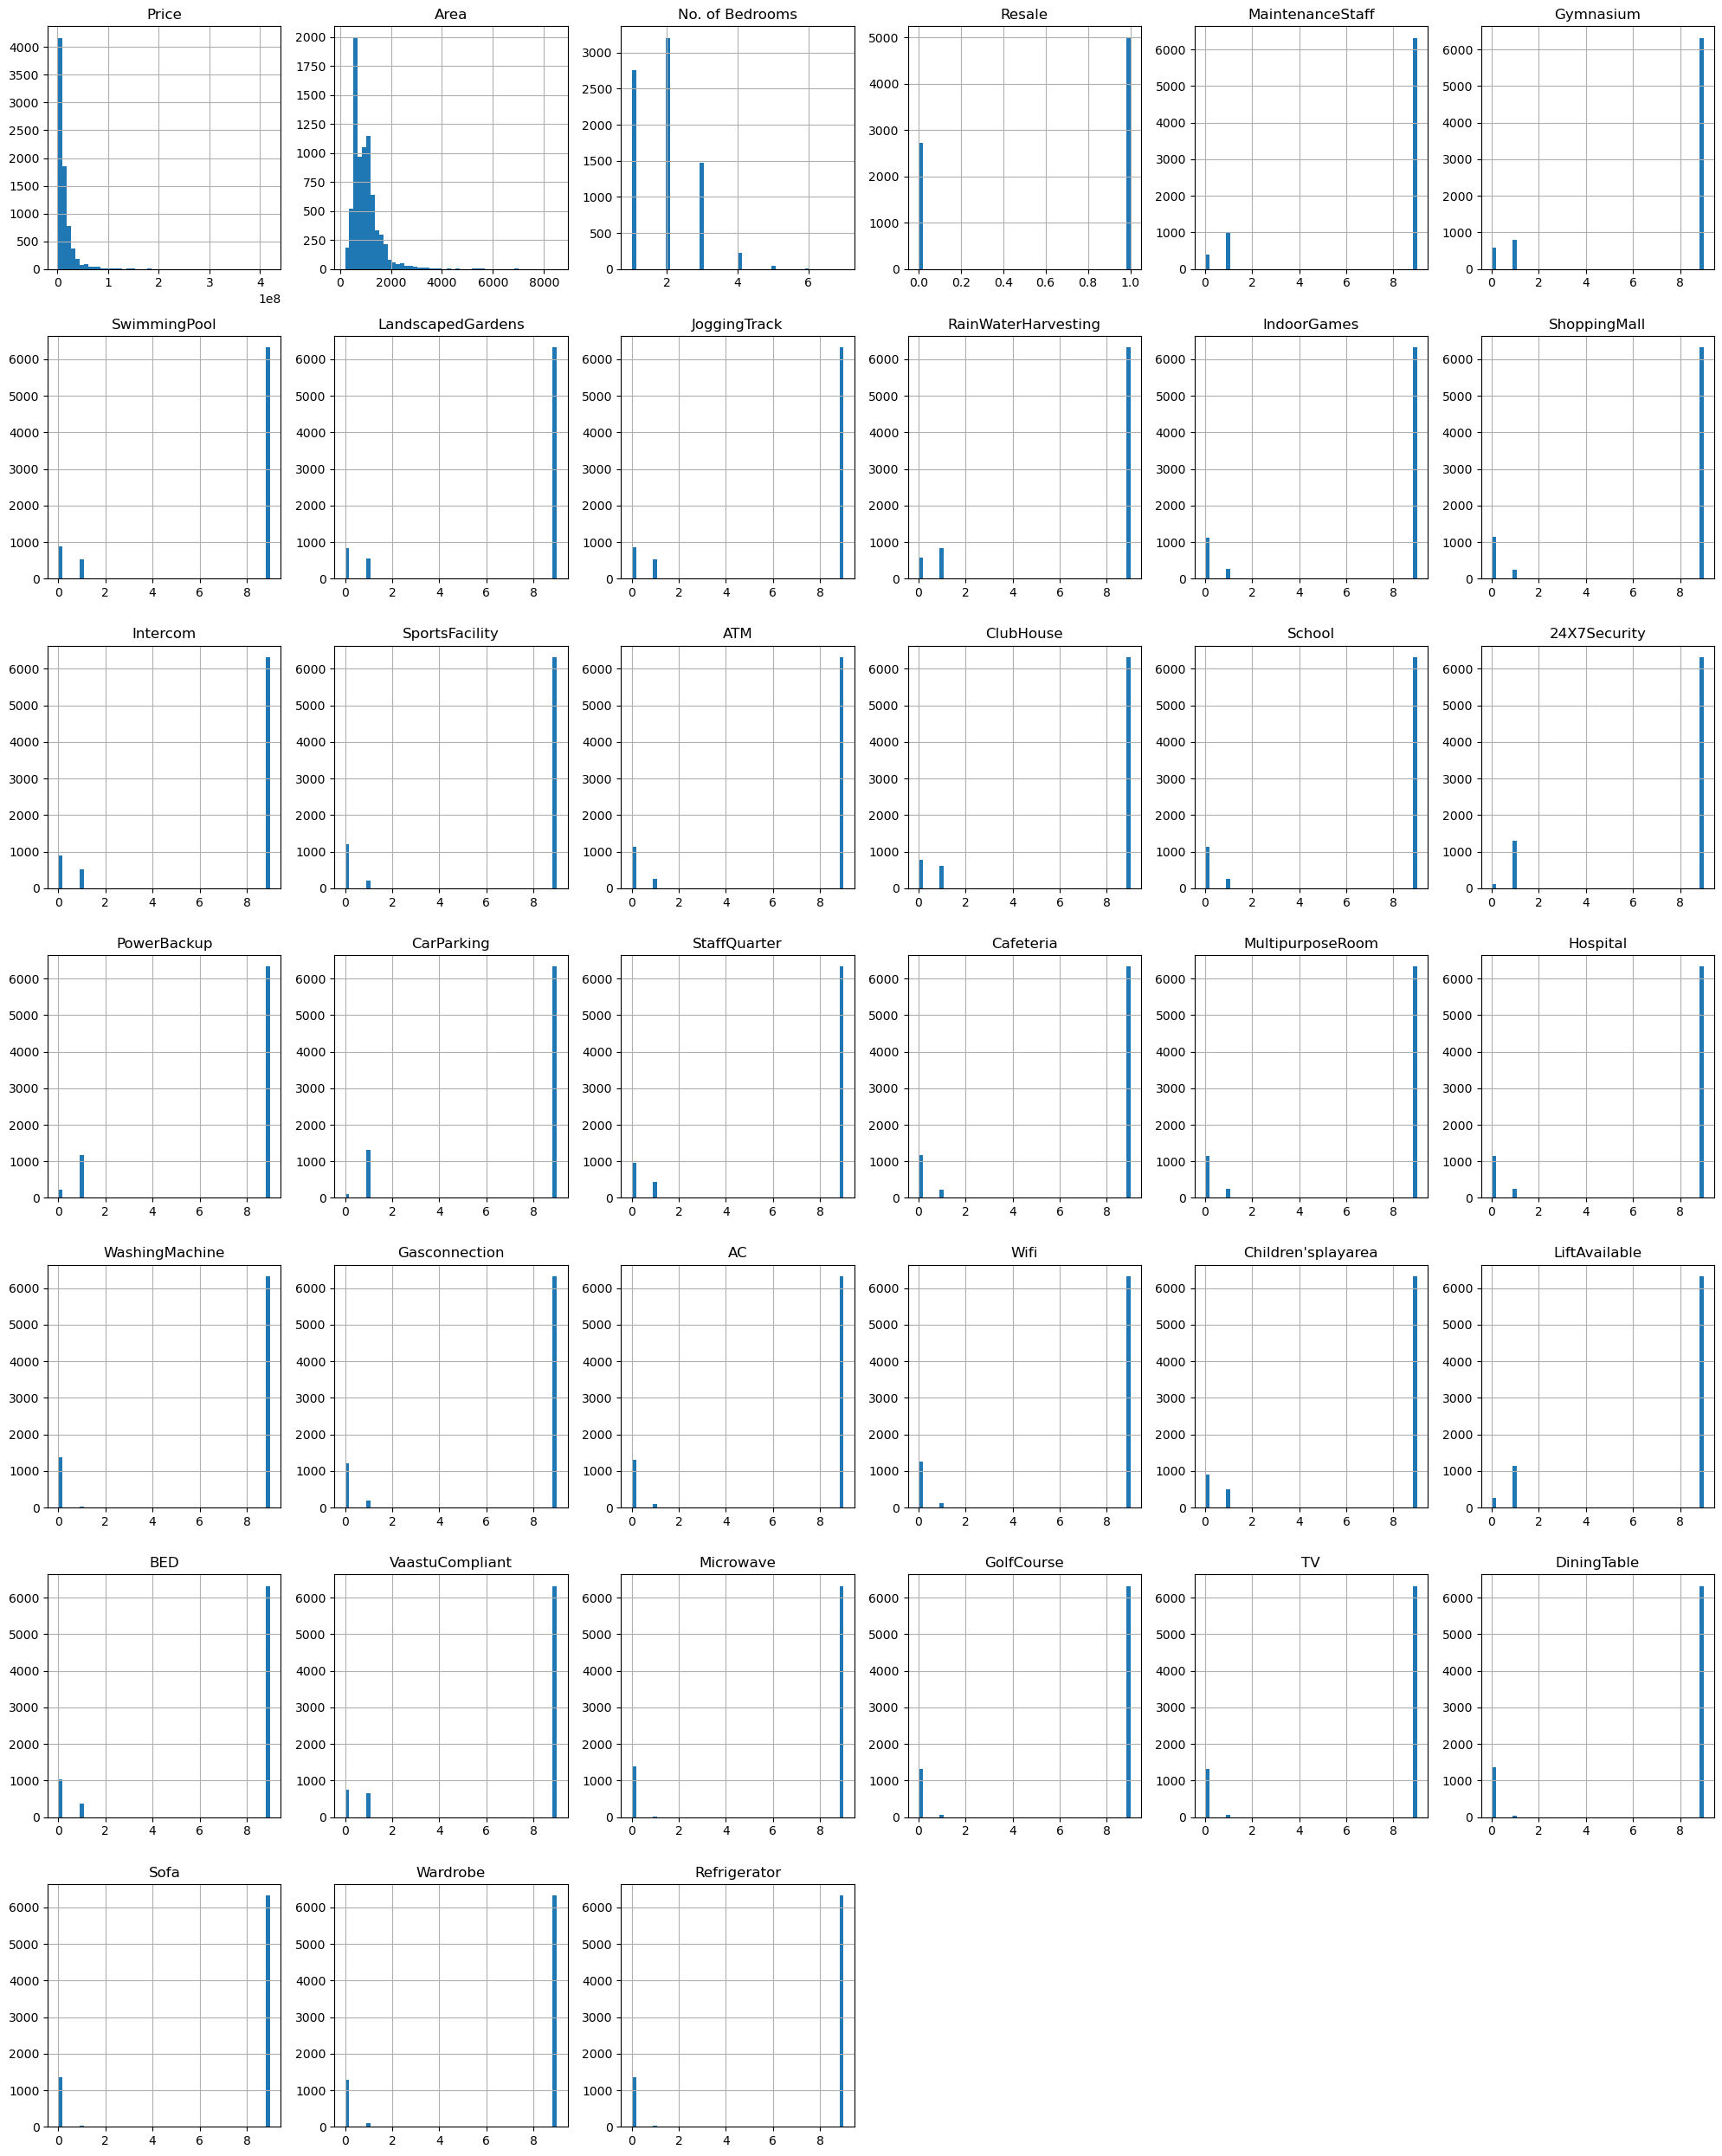

In [31]:
import matplotlib.pyplot as plt

# Generate the histograms
df.hist(bins=50, figsize=(20,25))

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


In [97]:
len(test_df)

1544

In [53]:
len(train_df)

6175

In [57]:
import numpy as np
for csv_file, df in dataframes.items():
    if 'Price' in df.columns:
        df['price_cat'] = pd.cut(df['Price'],
                                 bins=[0, 5000000, 10000000, 15000000, 20000000, np.inf],
                                 labels=[1, 2, 3, 4, 5])
        print(f"Added price_cat to {csv_file}")

Added price_cat to Bangalore.csv
Added price_cat to Chennai.csv
Added price_cat to Delhi.csv
Added price_cat to Hyderabad.csv
Added price_cat to Kolkata.csv
Added price_cat to Mumbai.csv


<Axes: >

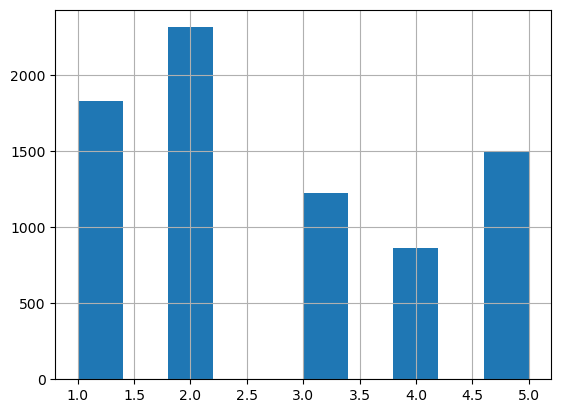

In [63]:
df["price_cat"].hist()


In [71]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_df, test_df in split.split(df,df["price_cat"]):
    strat_train_set = df.loc[train_df]
    strat_test_set = df.loc[test_df]
    

In [75]:
strat_test_set["price_cat"].value_counts() / len(strat_test_set)
# Category 2: Approximately 29.99% of the properties in the strat_test_set fall into this category.
# Category 1: Approximately 23.70% of the properties fall into this category.
# Category 5: Approximately 19.37% of the properties fall into this category.
# Category 3: Approximately 15.80% of the properties fall into this category.
# Category 4: Approximately 11.14% of the properties fall into this category.

price_cat
2    0.299870
1    0.237047
5    0.193653
3    0.158031
4    0.111399
Name: count, dtype: float64

In [77]:
# Now you should remove the price_cat attribute so the data is back to its original
# state:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("price_cat", axis=1, inplace=True)

In [115]:
housing =  strat_train_set.copy()


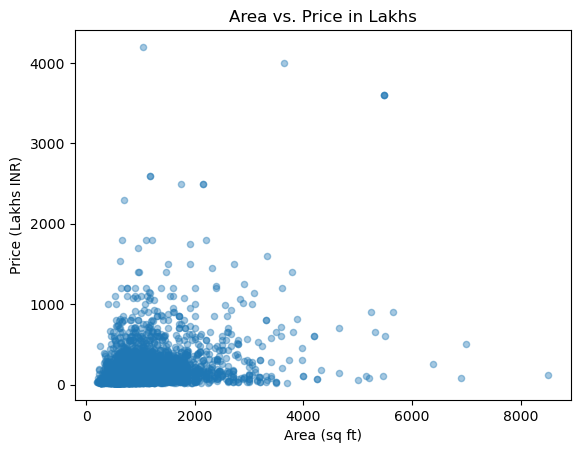

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'housing' is your DataFrame and it has 'Price' and 'Area' columns

# Convert Price to lakhs
housing['Price_in_Lakhs'] = housing['Price'] / 100000

# Scatter plot for Area vs. Price_in_Lakhs with additional parameters
housing.plot(kind="scatter", x="Area", y="Price_in_Lakhs", alpha=0.4)

plt.title("Area vs. Price in Lakhs")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (Lakhs INR)")
plt.show()


In [173]:
# Exclude non-numeric columns
numeric_housing = housing.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_housing.corr()
print(corr_matrix)


                        Price      Area  No. of Bedrooms    Resale  \
Price                1.000000  0.306580         0.273270 -0.046998   
Area                 0.306580  1.000000         0.809779 -0.026424   
No. of Bedrooms      0.273270  0.809779         1.000000 -0.108192   
Resale              -0.046998 -0.026424        -0.108192  1.000000   
MaintenanceStaff    -0.014796 -0.070193        -0.030282 -0.102591   
Gymnasium           -0.009652 -0.062031        -0.021974 -0.113383   
SwimmingPool        -0.005847 -0.058148        -0.019769 -0.116999   
LandscapedGardens   -0.007969 -0.062206        -0.024358 -0.119676   
JoggingTrack        -0.010426 -0.061098        -0.022543 -0.119041   
RainWaterHarvesting -0.009028 -0.061840        -0.022645 -0.110414   
IndoorGames         -0.008667 -0.062069        -0.023373 -0.118159   
ShoppingMall        -0.010217 -0.064780        -0.025607 -0.113661   
Intercom            -0.010798 -0.062653        -0.023757 -0.117249   
SportsFacility      

In [179]:
housing['Price_in_Lakhs'] = housing['Price'] / 100000

# Create derived columns
housing['price_per_sqft'] = housing['Price'] / housing['Area']
housing['avg_maintenance_per_area'] = housing['MaintenanceStaff'] / housing['Area']

# Display the first few rows of the DataFrame to verify
print(housing.head())

         Price  Area    Location  No. of Bedrooms  Resale  MaintenanceStaff  \
6693   8500000  1084    Seawoods                2       0                 9   
1864   9800000   950   Dattapada                2       1                 9   
5322  12000000  1100    Kharghar                2       1                 9   
1679   5000000   693        Ulwe                1       1                 9   
2872   4500000   728  Malad West                1       0                 9   

      Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
6693          9             9                  9             9  ...   
1864          9             9                  9             9  ...   
5322          9             9                  9             9  ...   
1679          9             9                  9             9  ...   
2872          9             9                  9             9  ...   

      Microwave  GolfCourse  TV  DiningTable  Sofa  Wardrobe  Refrigerator  \
6693          9     

In [185]:
import pandas as pd

# Assuming housing is your DataFrame and it is already loaded

# Select only numeric columns
numeric_housing = housing.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_housing.corr()

# Sort the correlations with 'Price' in descending order
sorted_corr = corr_matrix["Price"].sort_values(ascending=False)

# Display the sorted correlations
print(sorted_corr)


Price_in_Lakhs              1.000000
Price                       1.000000
price_per_sqft              0.777167
Area                        0.306580
No. of Bedrooms             0.273270
SwimmingPool               -0.005847
Gasconnection              -0.007754
Children'splayarea         -0.007766
AC                         -0.007839
LandscapedGardens          -0.007969
Cafeteria                  -0.008007
Wardrobe                   -0.008199
IndoorGames                -0.008667
TV                         -0.008731
LiftAvailable              -0.008962
ClubHouse                  -0.009003
RainWaterHarvesting        -0.009028
Refrigerator               -0.009395
Gymnasium                  -0.009652
SportsFacility             -0.009679
GolfCourse                 -0.009760
MultipurposeRoom           -0.009847
Sofa                       -0.009858
PowerBackup                -0.010123
DiningTable                -0.010126
WashingMachine             -0.010142
ShoppingMall               -0.010217
M

In [187]:
# let’s separate the predictors and the labels since we don’t necessarily want to apply
# the same transformations to the predictors and the target values (note that drop()
# creates a copy of the data and does not affect strat_train_set):
housing = strat_train_set.drop("Price", axis=1)
housing_labels = strat_train_set["Price"].copy()

In [229]:
# List of columns to drop
columns_to_drop = ["GolfCourse", "School"]

# Drop the columns
housing.drop(columns=columns_to_drop, axis=1, inplace=True)

# Check if the columns are removed by printing column names
print("Columns after dropping specified columns:")
print(housing.columns)

# Alternatively, use the info() method
print("\nDataFrame info after dropping specified columns:")
housing.info()


Columns after dropping specified columns:
Index(['Area', 'Location', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff',
       'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', '24X7Security', 'PowerBackup',
       'CarParking', 'StaffQuarter', 'Cafeteria', 'MultipurposeRoom',
       'Hospital', 'WashingMachine', 'Gasconnection', 'AC', 'Wifi',
       'Children'splayarea', 'LiftAvailable', 'BED', 'Microwave', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

DataFrame info after dropping specified columns:
<class 'pandas.core.frame.DataFrame'>
Index: 6175 entries, 6693 to 4811
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Area                 6175 non-null   int64 
 1   Location             6175 non-null   object
 2   No. of Bedroo

In [257]:
# You will need it later to replace missing values
# in the test set when you want to evaluate your system, and also once the system goes
# live to replace missing values in new data.
# Scikit-Learn provides a handy class to take care of missing values: SimpleImputer.
# Here is how to use it. First, you need to create a SimpleImputer instance, specifying
# that you want to replace each attribute’s missing values with the median of that
# attribute:

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming 'housing' is your DataFrame

# Select only numeric columns
housing_num = housing.select_dtypes(include=[np.number])

# Create the imputer with the median strategy
imputer = SimpleImputer(strategy="median")

# Fit the imputer on the numeric data
imputer.fit(housing_num)

# Transform the data
housing_num_imputed = imputer.transform(housing_num)

# Convert the result back to a DataFrame
housing_num_imputed = pd.DataFrame(housing_num_imputed, columns=housing_num.columns)

# Check the imputed DataFrame
print(housing_num_imputed.head())


     Area  No. of Bedrooms  Resale  MaintenanceStaff  Gymnasium  SwimmingPool  \
0  1084.0              2.0     0.0               9.0        9.0           9.0   
1   950.0              2.0     1.0               9.0        9.0           9.0   
2  1100.0              2.0     1.0               9.0        9.0           9.0   
3   693.0              1.0     1.0               9.0        9.0           9.0   
4   728.0              1.0     0.0               9.0        9.0           9.0   

   LandscapedGardens  JoggingTrack  RainWaterHarvesting  IndoorGames  ...  \
0                9.0           9.0                  9.0          9.0  ...   
1                9.0           9.0                  9.0          9.0  ...   
2                9.0           9.0                  9.0          9.0  ...   
3                9.0           9.0                  9.0          9.0  ...   
4                9.0           9.0                  9.0          9.0  ...   

   Wifi  Children'splayarea  LiftAvailable  BED  M

In [259]:
imputer.statistics_


array([900.,   2.,   1.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.])

In [261]:
 housing_num.median().values

array([900.,   2.,   1.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.])

In [263]:
X = imputer.transform(housing_num)

In [265]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [ ]:
Data Cleaning Successful